# MODS202 - Econometrics Final Project

## Authors:
- **Gabriele Lorenzo**
- **Aldo Pietromatera**

### Import modules

In [133]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import t, f

### Setup data for part 1

In [134]:
# load data
columns_name = [
    "price",
    "crime",
    "nox",
    "rooms",
    "dist",
    "radial",
    "proptax",
    "stratio",
    "lowstat",
    "lprice",
    "lnox",
    "lproptax",
]
raw_data = pd.read_csv(
    "./data/HPRICE2.raw", delim_whitespace=True, header=None, names=columns_name
)

raw_data.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


Note that, in the following theoretical questions, we will refer to the dataset as the matrix $X$.

**<font color="#cf2626" size="6">
    Part 1: Cross-Section Data
</font>**

**<font color="#0078D4" size="5">
    Question 1: State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators
are unbiased.
</font>**

The fundamental hypothesis is that the disturbance/error term is of zero conditional mean, i.e. 
$$
E(u|X) = E(u) = 0
$$
So, $X$ is uncorrelated with $u$.

Where $u$, as said above, represents the error term in the linear model (you can see it in the next question).

In other words, what you observe is independent from what you don't observe.

**<font color="#0078D4" size="5">
    Question 2: Show that under this assumption the OLS estimators are indeed unbiased.
</font>**

Consider the linear model:

$$
 y_i = \beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + \ldots + x_{iK}\beta_K + u_i
$$

Defining $ y = (y_1, \ldots, y_n)^\prime $, $ x_k = (x_{1k}, \ldots, x_{nk})^\prime $, $u = (u_1, \ldots, u_n)^\prime $, we can write the model in matrix notations:

$$ y = X\beta + u $$

with $ \beta = (\beta_1, \ldots, \beta_K)^\prime $ and $ X = [x_1, x_2, \ldots, x_K] $. 

OLS estimates are obtained by solving the following minimization problem:

$$ \min_\beta \sum_{i=1}^{n} u_i^\prime u_i = u^\prime u = (y - X\beta)^\prime (y - X\beta) $$

The first-order condition is:

$$ -2X^\prime (y - X\beta) = 0 $$

This is known as an orthogonality condition between $ X $ and $ u = (y - X\beta) $ by taking expectations. 

Re-arranging terms:

$$ (X^\prime X)\beta = X^\prime y $$

If there is no multi-collinearity, then the matrix $ (X^\prime X) $ can be inverted, and the OLS estimator is given by:

$$ \hat{\beta} = (X^\prime X)^{-1}X^\prime y$$

This estimator is unbiased if the fundamental assumption (in matrix form) $ E(X^\prime u) = 0 $ is satisfied:

$$ E \hat{\beta} = E((X^\prime X)^{-1}X^\prime(X\beta + u)) = \beta + E(X^\prime u) = \beta $$


**<font color="#0078D4" size="5">
    Question 3: Explain the sample selection bias with an example from the course.
</font>**

Sample selection bias occurs when the data points included in the analysis are not representative of the broader population. This non-random selection can lead to misleading conclusions and affect the generalizability of the study. 

Selection bias can arise in various ways, for example, in the course we introduced the **Survivor Bias** illustrating the examples of RAF planes returning from war zones.
In this case, the data points are not representative of the broader population of planes, since the planes that were shot down are not included in the analysis.

Is important to note that the sample selection bias is a broader concept than the survivor bias, since it can arise in many other ways.

**<font color="#0078D4" size="5">
    Question 4: Explain the omitted variable bias with an example from the course.
</font>**

We have an omitted variable bias when we **omit** a variable that is correlated with the dependent variable.

In other words, when we leave out a viariable that matters for the dependent variable $y$.

In the course we saw the example in which we were trying to compute the wage of a person observing how many years of education the person has and the innate ability of that person. So, our model should be like:

$$ 
wage = \beta_0 + \beta_1 educ + \beta_2 abil + u.
$$

This model obtains $\beta_0$, $\beta_1$ and $\beta_2$ which are unbiased, i.e, we runned a regression in educ and abil and got these unbiased coeficients.

Although, imagine we exclude $\beta_2$, running a regression with only educ, that gives us the following model:

$$
wage = \tilde{\beta}_0 + \tilde{\beta}_1 educ + v
$$

In this new model we have that $v = \beta_2 abil + u$, and that $\tilde{\beta}_1 \neq \beta_1$.

In fact, when we don't include the other variable in our regression we obtain, in general, an biased estimator $\tilde{\beta}_1$.

It can be shown that $ E(\tilde{\beta}_1) = \beta_1 + \tilde{\beta}_2 \tilde{\delta}_1$, where $\tilde{\delta}_1$ is the sample covariance between educ and abil. So $\tilde{\beta}_1$ is unbiased only if $\tilde{\delta}_1=0$, which means that educ and abil are uncorrelated.

In our example, in general, we believe that $educ$ and $abil$ are positive correlated and as more hability leads to higher productivity we have that $\beta_2 > 0$, so we conclude that the OLS estimators for the equation $wage = \tilde{\beta}_0 + \tilde{\beta}_0 educ + v$ are on average too large.

**<font color="#0078D4" size="5">
    Question 5: Explain the problem of multicollinearity. Is it a problem in this dataset?
</font>**

The multicollinearity problem arises when two or more columns of the matrix $ X $ are linearly dependent (or almost).

If so, the determinant of the matrix $ (X^\prime X) $ is zero or almost zero.

$$
det(X^\prime X) = 0 
$$


In this case, the matrix $ (X^\prime X) $ is not invertible, and the OLS estimator cannot be computed.

A solution to this problem is to drop one of the linearly dependent columns or to add some observations to the dataset.

The dataset of the project does not have a multicollinearity problem because the determinant of the matrix $ (X^\prime X) $ is not zero, as shown in the code below:

In [135]:
# columns_name = ["price", "crime", "nox", "rooms", "dist", "radial", "proptax", "stratio", "lowstat", "lprice", "lnox", "lproptax"]
X = raw_data[columns_name]

print("Determinant of the matrix (X'X): ", np.linalg.det(X.T.dot(X)))

Determinant of the matrix (X'X):  4.0362932604729155e+42


**<font color="#0078D4" size="5">
    Question 6: Create three categories of nox levels (low, medium, high), corresponding to the following
    percentiles: 0-39%, 40%-60%, 61%-100%
</font>**

In [136]:
percentiles = [0, 0.4, 0.6, 1]
labels = ["low", "medium", "high"]
raw_data["nox_cat"] = pd.qcut(raw_data["nox"], q=percentiles, labels=labels)

# create a column in raw_data that is 0 if nox_cat is low and 1 otherwise
raw_data["nox_cat_m_h"] = np.where(raw_data["nox_cat"] == "low", 0, 1)

raw_data.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_cat,nox_cat_m_h
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,medium,1
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,low,0
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,low,0
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,low,0
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,low,0


**<font color="#0078D4" size="5">
    Question 7: Compute for each category of nox level the average median price and comment on your
    results
</font>**

In [137]:
avg_medianPrice_per_noxCat = (
    raw_data.groupby("nox_cat", observed=False)["price"]
    .mean()
    .reset_index()
    .rename(columns={"price": "avg_medianPrice"})
)

avg_medianPrice_per_noxCat.head()

,nox_cat,avg_medianPrice
0,low,27170.609524
1,medium,20661.824742
2,high,18496.477387


**<font color="#0078D4" size="5">
    Question 8: Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis.
</font>**

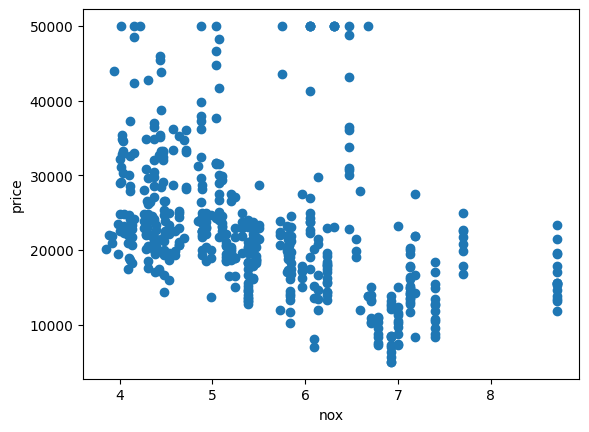

In [138]:
plt.scatter(raw_data["nox"], raw_data["price"])
plt.xlabel("nox")
plt.ylabel("price")
plt.show()

**<font color="#0078D4" size="5">
    Is this a Ceteris Paribus effect?
</font>**

Ceteris paribus is a concept used in statistical analysis where the effect of a single variable is examined while keeping all other variables constant. 

A scatter plot alone cannot demonstrate a ceteris paribus effect, because, a scatter plot shows the relationship between two variables, such as 'price' and 'nox', but it doesn't account for the influence of other variables. To assess the ceteris paribus effect, you would typically use regression analysis, where you can control for the impact of other variables and isolate the specific effect of 'nox' on 'price' while holding other factors constant.

So, what we can do is to ensure that the relationship between the variable of interest and the dependent variable appears linear in the scatterplot. 

If the relationship is non-linear, the ceteris paribus assumption might be violated, like in our case.

**<font color="#0078D4" size="5">
    Question 9: Run a regression of price on a constant, crime, nox, rooms, proptax.
    Comment on the histogram of the residuals.
    Interpret all coefficients.
</font>**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        23:43:54   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

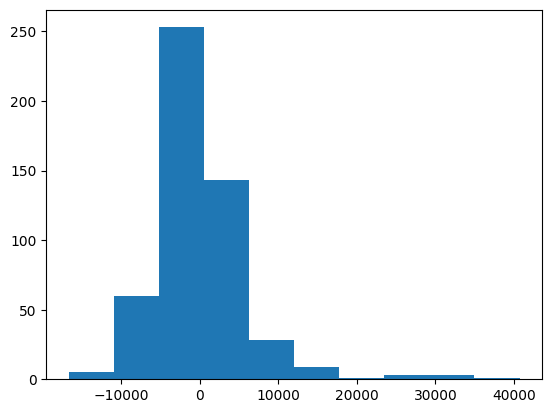

In [139]:
# create X and y
X = raw_data[["crime", "nox", "rooms", "proptax"]]
y = raw_data["price"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# plot residuals
plt.hist(model.resid)
plt.show()

**<font color="#0078D4" size="5">
    Comment on the histogram of the residuals.
</font>**

The histogram of the residuals is not normally distributed. It is skewed to the right.
This means that the model is not a good fit.

**<font color="#0078D4" size="5">
    Interpret all coefficients.
</font>**

- The coefficient of crime is negative, which means that the higher the crime rate, the lower the price.
- The coefficient of nox is negative, which means that the higher the nox, the lower the price.
- The coefficient of rooms is positive, which means that the higher the number of rooms, the higher the price.
- The coefficient of proptax is negative, which means that the higher the proptax, the lower the price.

**<font color="#0078D4" size="5">
    Question 10: Run a regression of lprice on a constant, crime, nox, rooms, proptax. 
</font>**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        23:43:54   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

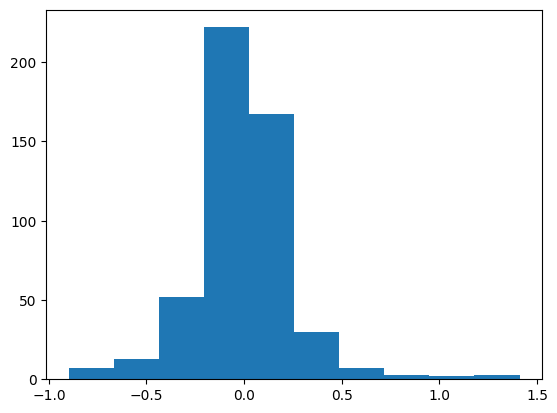

In [140]:
# the only difference is that we use lprice instead of price
X0 = X
y = raw_data["lprice"]

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

df_u = model.df_resid
u = model.resid
SSR0 = model.ssr
print("SSR0=", SSR0)

# plot residuals
plt.hist(model.resid)
plt.show()

**<font color="#0078D4" size="5">
    Comment on the histogram of the residuals.
</font>**

The histogram of the residuals is more normal than the one from the previous question.
This is because we used the log of the price instead of the price itself.
This is a common transformation to do when the distribution of the dependent variable is skewed.
In this case, the distribution of the dependent variable is skewed to the right.

**<font color="#0078D4" size="5">
    Interpret all coefficients.
</font>**
- The coefficient of crime is negative and significant. This means that the higher the crime rate, the lower the price of the house.
- The coefficient of nox is negative and significant. This means that the higher the nox, the lower the price of the house.
- The coefficient of rooms is positive and significant. This means that the more rooms, the higher the price of the house.
- The coefficient of proptax is negative and significant. This means that the higher the proptax, the lower the price of the house.
- The coefficient of the constant is positive and significant. This means that the price of the house is positive even when all the other variables are 0.

**<font color="#0078D4" size="5">
    Question 11: Run a regression of lprice on a constant, crime, lnox, rooms, lproptax.
</font>**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.77e-101
Time:                        23:43:54   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

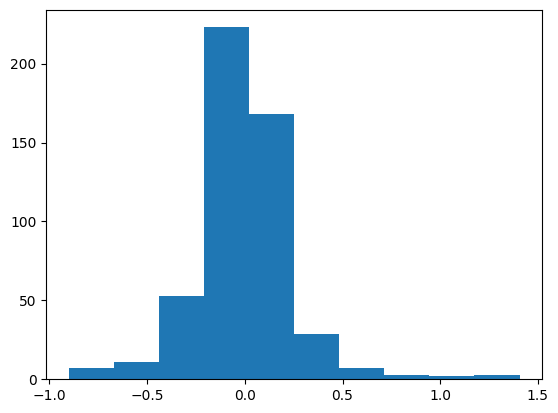

In [141]:
# create X and y
X = raw_data[["crime", "lnox", "rooms", "lproptax"]]
y = raw_data["lprice"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# plot residuals
plt.hist(model.resid)
plt.show()

**<font color="#0078D4" size="5">
    Comment on the histogram of the residuals.
</font>**

The histogram of the residuals is more symmetric than the previous one.
The mean is close to zero and the variance is constant.

**<font color="#0078D4" size="5">
    Interpret all coefficients.
</font>**
- The coefficient of crime is negative and significant. This means that the higher the crime rate, the lower the price of the house.
- The coefficient of lnox is negative and significant. This means that the higher the nox, the lower the price of the house.
- The coefficient of rooms is positive and significant. This means that the more rooms, the higher the price of the house.
- The coefficient of lproptax is negative and significant. This means that the higher the proptax, the lower the price of the house.

**<font color="#0078D4" size="5">
    Question 12: In the specification of question 10, test the hypothesis $H_0$: $\beta_{nox} >0$ vs. $H_1$: $\beta_{nox} < 0$ at the 10%
    level
</font>**

When we state the alternative like H1: $\beta_{nox} < 0$, we are doing a one-tailed test and we are really saying that the null hypothesis is $\beta_{nox} >= 0$. We only care about detecting that $\beta_j$ is different from zero when $\beta_j$ is actually negative. In other words, if we reject $\beta_j = 0$, then we automatically reject $\beta_j > 0$.

Therefore, it suffices to act as if we are testing H0: $\beta_{nox} = 0$ vs. H1: $\beta_{nox} < 0$.

That is a one-tailed test.

In [142]:
alpha = 0.1

# re-create X and y for question 10
X = raw_data[["crime", "nox", "rooms", "proptax"]]
y = raw_data["lprice"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# t-statistic for nox
t_Bnox = model.tvalues["nox"]
df = model.df_resid
print("t_nox=", t_Bnox)

# critical value for t-distribution
critical_value = t.ppf(
    alpha, df
)  # We are using alpha (instead of 1-alpha) because the test is t_nox < -c  with c > 0
print("critical_value=", critical_value)

print("Reject H0?  ", t_Bnox < critical_value)

t_nox= -3.557029010007289
critical_value= -1.2832436320111769
Reject H0?   True


**<font color="#0078D4" size="5">
    Question 13: In the specification of question 10, test the hypothesis $H_0: \beta_{nox} = 0 $ vs. $H_1: \beta_{nox} ≠ 0 $ at the 10% level using the p-value of the test
</font>**

In this case we are testing the null hypothesis $H_0$ against a two-sided alternative hypothesis $H_1$.

The rejection rule is:
$$
    |{t}| > c
$$

where c is the critical value of the t-distribution with n-k-1 degrees of freedom and a significance level of 10% (5% each side).

OSS. We are using the summary of the question 12 above.

In [143]:
# with the p-value method
alpha = 0.1

p_value = model.pvalues["nox"]
print("p-value: ", p_value)

# compare p-value and alpha
print("Reject H0? : ", p_value < alpha)

p-value:  0.0004106959052589233
Reject H0? :  True


Or, with the t-statistic method... (just to verify)

In [144]:
# compute t-statistic
t_statistic_abs = np.abs(model.tvalues["nox"])
print("t-statistic: ", t_statistic_abs)

# compute critical value
critical_value = t.ppf(1 - alpha / 2, df=model.df_resid)
print("critical value: ", critical_value)

# compare t-statistic and critical value
print("Reject H0? : ", t_statistic_abs > critical_value)

t-statistic:  3.557029010007289
critical value:  1.647900748316425
Reject H0? :  True


**<font color="#0078D4" size="5">
    Question 14: In the specification of question 10, test the hypothesis $H_0$: $\beta_{crime} = \beta_{proptax} $ at the 1% level
</font>**

In order to perform this test, we define the variable $\theta = \beta_{crime} - \beta_{proptax}$. Then, we test the hypothesis H0: $\theta = 0$ vs. H1: $\theta ≠ 0$ at the 1% level.

Starting from the X of question 10:
$$
X_{question10} = \beta_0 + \beta_{crime} * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
$$
\theta = \beta_{crime} - \beta_{proptax}
$$
and so:
$$
\beta_{crime} = \theta + \beta_{proptax}
$$
Rewriting $X_{question10}$ in terms of $\theta$:
$$
X_{question10} = \beta_0 + (\theta + \beta_{proptax}) * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
$$
X_{question10} = \beta_0 + \theta * crime + \beta_{proptax} * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
Finally, we can rewrite $X_{question10}$ in order to answer the question:
$$
X = \beta_0 + \theta * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * (crime + proptax) + \epsilon
$$

In [145]:
# create X and y
crime = raw_data["crime"]
proptax = raw_data["proptax"]
nox = raw_data["nox"]
rooms = raw_data["rooms"]
lprice = raw_data["lprice"]

X = np.column_stack((crime, nox, rooms, proptax + crime))
y = lprice

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        23:43:55   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

If the p-value is less than 0.01, you would reject the null hypothesis at the 1% level of significance.

In [146]:
alpha = 0.01
variable = "x1"  # this will be our theta

print("p_value: ", model.pvalues[variable])

print("Reject H_0 ?", model.pvalues[variable] < alpha)

p_value:  0.0003202080646092541
Reject H_0 ? True


**<font color="#0078D4" size="5">
    Question 15: In the specification of question 10, test the hypothesis $H_0: \beta_{nox} = 0, \beta_{proptax} = 0$ at the 1% level
</font>**

In [147]:
alpha = 0.01

X = raw_data[["crime", "rooms"]]
y = raw_data["lprice"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# degrees of freedom of the restricted model
df_r = model.df_resid

q = df_r - df_u

SSR1 = model.ssr

# df_r and df_u are the degrees of freedom of the restricted (this one) and unrestricted (question 10) model respectively
F = ((SSR1 - SSR0) / q) / (SSR0 / df_u)
print("F=", F)

p_val = f.sf(F, q, df_u) * 2
print("p_val=", p_val)

print("\nReject H_0 ?", p_val < alpha)

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     319.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.82e-90
Time:                        23:43:55   Log-Likelihood:                -57.988
No. Observations:                 506   AIC:                             122.0
Df Residuals:                     503   BIC:                             134.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0219      0.113     71.041      0.0

**<font color="#0078D4" size="5">
    Question 16: In the specification of question 10, test the hypothesis $H_0: \beta_{nox} = -500$, $\beta_{proptax} = -100$ at the 1% level using the p-value of the test
</font>**

In [148]:
# X = raw_data[["crime", "rooms"]]  # same as question 15
y = raw_data["lprice"] + 500 * raw_data["nox"] + 100 * raw_data["proptax"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# degrees of freedom of the restricted model
df_r = model.df_resid

SSR1 = model.ssr

# df_r and df_u are the degrees of freedom of the restricted (this one) and unrestricted (question 10) model respectively
q = df_r - df_u

F = ((SSR1 - SSR0) / q) / (SSR0 / df_u)
print("\nF=", F)

p_val = f.sf(F, q, df_u) * 2
print("\np_val=", p_val)

print("\nReject H_0 ?", p_val < alpha)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           9.89e-52
Time:                        23:43:55   Log-Likelihood:                -4473.9
No. Observations:                 506   AIC:                             8954.
Df Residuals:                     503   BIC:                             8966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.014e+04    696.468     14.560      0.0

**<font color="#0078D4" size="5">
    Question 17: In the specification of question 10, test the hypothesis $H_0: \beta_{nox} + \beta_{proptax} = -1000$ at the 1% 
level using the p-value of the test
</font>**

We can rewrite the null hypothesis as:

$$
H_0:  -1000 - \beta_{proptax} - \beta_{nox} = 0
$$

Then, we can define $\theta = -1000 - \beta_{proptax} - \beta_{nox}$ and test the hypothesis $H_0: \theta = 0$

$$  
    \beta_{nox} = -1000 - \beta_{proptax} - \theta
$$

We can rewrite the X of question 10 as:

$$
X = \beta_0 + \beta_{crime} * crime + (-1000 - \beta_{proptax} - \theta) * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$

$$
X = \beta_0 + \beta_{crime} * crime - 1000 * nox - \theta * nox + \beta_{rooms} * rooms + \beta_{proptax} * (proptax - nox) + \epsilon
$$

$$
X = \beta_0 + \beta_{crime} * crime - \theta * nox + \beta_{rooms} * rooms + \beta_{proptax} * (proptax - nox) + \epsilon
$$

And the y will become:

$$
    y = log(price) + 1000 * nox
$$


In [149]:
# create X and y
crime = raw_data["crime"]
proptax = raw_data["proptax"]
nox = raw_data["nox"]
rooms = raw_data["rooms"]

X = np.column_stack((crime, nox, rooms, proptax - nox))
y = raw_data["lprice"] + 1000 * raw_data["nox"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.580e+09
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:43:55   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

In [150]:
alpha = 0.01
variable = "x2"  # this will be our theta

print("p_val=", model.pvalues[variable])
print("Reject H_0 ?", model.pvalues[variable] < alpha)

p_val= 0.0
Reject H_0 ? True


**<font color="#0078D4" size="5">
    Question 18: In the specification of question 10, test the hypothesis that all coefficients are the same for 
observations with low levels of nox vs. medium and high levels of nox.
</font>**

For questions 18 and 19, we will assume $\alpha = 5\%$

In [151]:
mask = raw_data["nox_cat_m_h"] == 0  # mask in order to retrieve low nox

*Unrestricted model*
$$lprice = \beta_0 + \beta_1 * crime + \beta_2 * nox + \beta_3 * rooms + \beta_4 * proptax + u$$

*Restricted model*
$$lprice - \beta1 * crime - \beta2 * nox - \beta3 * rooms - \beta4 * proptax + = \beta0 + u$$

where $\beta_n$ is the result of the unrestricted model $\forall n$.

In [152]:
# estimate the coefficient for low levels of nox
x_unrestricted = raw_data[mask][["crime", "nox", "rooms", "proptax"]]
x_unrestricted = sm.add_constant(x_unrestricted)

y_unrestricted = raw_data[mask]["lprice"]

model = sm.OLS(y_unrestricted, x_unrestricted)
results_unrestricted = model.fit()

x_medium_high = raw_data[~mask][["crime", "nox", "rooms", "proptax"]]
y_medium_high = raw_data[~mask]["lprice"]

x_restricted = sm.add_constant(x_medium_high)[["const"]]
y_restricted = (
    y_medium_high
    - results_unrestricted.params["crime"] * x_medium_high["crime"]
    - results_unrestricted.params["nox"] * x_medium_high["nox"]
    - results_unrestricted.params["rooms"] * x_medium_high["rooms"]
    - results_unrestricted.params["proptax"] * x_medium_high["proptax"]
)

model_restricted = sm.OLS(y_restricted, x_restricted)
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / (SSR_unrestricted / ddf)

alpha = 0.05  # 5% significance level
critical_value = f.ppf(1 - alpha, q, ddf)

print(f"F Statistic: {F_statistic}")
print(f"Critical Value: {critical_value}")

print("Reject H_0 ?", F_statistic > critical_value)

F Statistic: 2284.0159417043687
Critical Value: 2.3897311892176356
Reject H_0 ? True


**<font color="#0078D4" size="5">
    Question 19: Repeat the test of question 18 but now assuming that only the coefficients of nox and
proptax can change between the two groups of observations. State and test $H_0$.
</font>**

Our null hypoteshis will be:

$$
    H_0: \beta_{i_{low}} = \beta_{i_{highMmedium}} \forall i \in \{2, 4\}
$$

and the alternative hypoteshis will be:

$$
       H_1: \beta_{i_{low}} != \beta_{i_{highMedium}} \exists i \in \{2,4\}
$$

In [153]:
# estimate the coefficient for low levels of nox
x_unrestricted = raw_data[mask][["crime", "nox", "rooms", "proptax"]]
x_unrestricted = sm.add_constant(x_unrestricted)

y_unrestricted = raw_data[mask]["lprice"]

model = sm.OLS(y_unrestricted, x_unrestricted)
results_unrestricted = model.fit()

# estimate the restricted model for medium and high levels of nox

x_medium_high = raw_data[~mask][["crime", "nox", "rooms", "proptax"]]
x_restricted = x_medium_high[["crime", "rooms"]]
x_restricted = sm.add_constant(x_restricted)

y_medium_high = raw_data[~mask]["lprice"]
y_restricted = (
    y_medium_high
    - results_unrestricted.params["nox"] * x_medium_high["nox"]
    - results_unrestricted.params["proptax"] * x_medium_high["proptax"]
)

model_restricted = sm.OLS(y_restricted, x_restricted)
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / (SSR_unrestricted / ddf)

alpha = 0.05  # 5% significance level
critical_value = f.ppf(1 - alpha, q, ddf)

print(f"F Statistic: {F_statistic}")
print(f"Critical Value: {critical_value}")

print("Reject H_0 ?", F_statistic > critical_value)

F Statistic: 2535.861576291274
Critical Value: 3.013716892515854
Reject H_0 ? True


### Setup data for part 2:

In [154]:
# price     crime     nox       rooms     dist      radial
# proptax   stratio   lowstat   lprice    lnox      lproptax

df = pd.read_csv("./data/HPRICE2.raw", delim_whitespace=True, header=None)

price = df[0]
crime = df[1]
nox = df[2]
rooms = df[3]
proptax = df[6]
lprice = df[9]
lnox = df[10]
lproptax = df[11]

const = np.ones(len(price))

**<font color="#cf2626" size="6">
    Part 2: HETEROSKEDASTICITY
</font>**

**<font color="#0078D4" size="5">
    Question 20: Explain the problem of heteroskedasticity with an example of the course.
</font>**

Following the definition of heteroskedasticity, we can say that it is a problem that occurs when the variance of the error term is not constant. In other words, the variance of the error term is not the same for all observations. This is a problem because it violates the assumption of homoskedasticity, which is one of the assumptions of the classical linear regression model.
In particular we can't say anymore that the OLS estimator is BLUE (Best Linear Unbiased Estimator).


In one of our class examples, we looked at how house prices relate to different things. Imagine trying to predict house prices using a model. Well, sometimes the difference between our predicted prices and the actual prices can change a lot, especially when houses get bigger. Smaller houses have more consistent predictions, but as houses get larger, the difference between predicted and actual prices can vary a lot. This makes it tricky to use the usual method, Ordinary Least Squares (OLS), which assumes that these differences stay about the same for all houses.

**<font color="#0078D4" size="5">
    Question 21: Suppose that $E[uu]' = \sigma^2 \Omega$. Show that the GLS estimator is the best linear unbiased estimator
</font>**

Fistly, considering the model $y = X \beta + u$, where $E(u|X) = 0$, we derive the expression of the OLS estimator of $\beta$, called $b$. Considering a set of $n$ i.i.d. observations, the collected data is represented by the following esquation:

$$
y = X b + u
$$

In order to derive an expression for $b$, we minimize sum of the squared residuals.

To do that, it is first necessary to isolate the expression of $u$ and then, compute its transpose, so that the product $u' u$ can be minimized.

$$
u = y - X b \Rightarrow u' = (y - X b)' = y' - b' X'
$$

Thus, the product to be minimized is:

$$
u' u = (y' - b' X')(y - X b) = y'y - y'Xb - b'X'y + b'X'Xb 
$$

By noting that $b'X'y = (b'X'y)' = y'Xb$, we arrive in the following expression:

$$
\text{min } u'u = y'y - 2b'X'y + b'X'Xb
$$

Finally, what is necessary to do is to take the partial derivative of the equation above with respect to $b$ and solve it when it is equal to zero. To that, we use the two following results:

$$
\left\{\begin{matrix}
\frac{\partial}{\partial b} (b'X'y) = X'y \\ 
\frac{\partial}{\partial b} (b'X'Xb) = 2X'Xb 
\end{matrix}\right.
$$

With the above, the equation to be solved for $b$ will be:

$$
\frac{\partial}{\partial b} (u'u) = 0 \iff -2X'y + 2X'Xb = 0 \iff X'Xb = X'y \iff b = (X'X)^{-1}X'y
$$

Now that the estimator has been computed, to show that it is the best linear unbiased estimator (BLUE), we first check that it is linear. Indeed, the linearity is checked immediately by seeing the linear relatioship between $b$ and the dependent variable $y$. The second step is to show its unbiasedness. To do that, we compute its expected value.

$$
E(b) = E\left((X'X)^{-1}X'y\right) = (X'X)^{-1}X'E(y)
$$

Since the assumption $E(u|X) = 0$ holds, then $E(y) = X \beta$ and we can rewrite the equation for $E(b)$  as follows:
$$
E(b) = (X'X)^{-1}(X'X) \beta \iff E(b) = \beta
$$

That means that the estimator $b$ is unbiased.

Now, for the next steps, it is useful to rewrite the expression of $b$ as follows:

$$
\left.\begin{matrix}
y = X \beta + u \\ 
b = (X'X)^{-1}X'y
\end{matrix}\right\}\Rightarrow 
b = \beta + (X'X)^{-1}X'u
$$

We can compute the variance of the estimator considering the Heteroskedasticity supposition that $Var(u) = E(uu') = \sigma^{2}\Omega$.

$$
\begin{align*}
Var(b) &= Var\left(\beta + (X'X)^{-1}X'u\right) \\
       &= Var\left((X'X)^{-1}X'u\right) \\
       &= (X'X)^{-1}X' Var(u) X(X'X)^{-1} \\
       &= (X'X)^{-1}X' \sigma^{2} \Omega X(X'X)^{-1}\\
\end{align*}
$$

Therefore, the following equation contains the result of the variance of the estimator, considering Heteroskedasticity.

$$
Var(b) = \sigma^{2} (X'X)^{-1}X' \Omega X(X'X)^{-1}
$$

Using the Aitken's Theorem that states that "The GLS estimator is BLUE", we can conclude the proof.

**<font color="#0078D4" size="5">
    Question 22:  In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test $H_0: \delta_{crime}, \delta_{nox}, \delta_{room}, \delta_{proptax}=0$, where the coefficients $\delta_k$ (k=crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.
</font>**

In [155]:
# IMPORTANT
# we used specifications from question 9

from scipy.stats import f
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

y = price
X = np.column_stack((const, crime, nox, rooms, proptax))

model_0 = sm.OLS(y, X).fit()
u = model_0.resid
u2 = u**2

y = u2
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())  # reject H0 p-value < 0.05

R2_1 = model_1.rsquared
n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

if p_value < 0.05:
    print("Reject H0, there is heteroskedasticity")
else:
    print("Fail to reject H0, there is no heteroskedasticity")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.47e-05
Time:                        23:43:55   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

In order to verify the correctness of our solution (following the guideline in the TP), we compered the magnitude of our p_value with the ones obtained using library functions from statsmodel.

In [156]:
_, _, F, p_value = het_breuschpagan(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_white(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

F-statistic:  4.356640145974687
p-value:  0.0017958275801663627
---------
F-statistic:  3.260206661330142
p-value:  5.552933562690138e-05
---------


**<font color="#0078D4" size="5">
    Question 23: In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form.
</font>**

In [157]:
# IMPORTANT
# we used specifications from question 10

y = lprice
X = np.column_stack((const, crime, nox, rooms, proptax))

model_0 = sm.OLS(y, X).fit()
u = model_0.resid
u2 = u**2

y = u2
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())  # reject H0 p-value < 0.05

R2_1 = model_1.rsquared
n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

if p_value < 0.05:
    print("Reject H0, there is heteroskedasticity")
else:
    print("Fail to reject H0, there is no heteroskedasticity")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           8.33e-14
Time:                        23:43:55   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0757      0.090      0.842      0.4

In order to verify the correctness of our solution (following the guideline in the TP), we compered the magnitude of our p_value with the ones obtained using library functions from statsmodel.

In [158]:
_, _, F, p_value = het_breuschpagan(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_white(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

F-statistic:  7.894896673424933
p-value:  3.5494000856709975e-06
---------
F-statistic:  6.731126751811877
p-value:  1.256942581520943e-12
---------


**<font color="#0078D4" size="5">
    Question 24: In the specification of question 12, test the hypothesis of no heteroskedasticity of linear form.
</font>**

In [159]:
# IMPORTANT
# we used specifications from question 11

y = lprice
X = np.column_stack((const, crime, lnox, rooms, lproptax))
model_0 = sm.OLS(y, X).fit()

u = model_0.resid
u2 = u**2

y = u2
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())  # reject H0 p-value < 0.05

R2_1 = model_1.rsquared
n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

if p_value < 0.05:
    print("Reject H0, there is heteroskedasticity")
else:
    print("Fail to reject H0, there is no heteroskedasticity")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.51
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.02e-12
Time:                        23:43:55   Log-Likelihood:                 184.66
No. Observations:                 506   AIC:                            -359.3
Df Residuals:                     501   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5496      0.167     -3.289      0.0

In order to verify the correctness of our solution (following the guideline in the TP), we compered the magnitude of our p_value with the ones obtained using library functions from statsmodel.

In [160]:
_, _, F, p_value = het_breuschpagan(model_1.resid, model_1.model.exog)
print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_white(model_1.resid, model_1.model.exog)
print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

F-statistic:  6.881800535355378
p-value:  2.1308678532705283e-05
---------
F-statistic:  6.367690840074395
p-value:  8.163351511935848e-12
---------


**<font color="#0078D4" size="5">
   Question 25: Comment on the differences between your results of questions 22, 23, 24.
</font>**

Heteroscedasticity is evident across all questions addressed.

The transformations applied from one question to another primarily involved taking the logarithm of a variable, whether it was independent or not. This approach aimed to mitigate the overall impact of heteroscedasticity. However, it didn't yield a model free of this issue. Consequently, we can infer that the disparities persist in the variables used, despite yielding largely similar outcomes.

**<font color="#0078D4" size="5">
    Question 26: Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.
</font>**

In [161]:
# first perform a normal OLS regression, then regress the squared residuals on the same variables as the original regression

y_0 = price
X = np.column_stack((const, crime, nox, rooms, proptax))

model_0 = sm.OLS(y_0, X).fit()
u = model_0.resid
u2 = u**2

y = u2
model_ols = sm.OLS(y, X).fit()
print(model_ols.summary())

# find the variable with the lowest p-value
p_values = model_ols.pvalues
p_values = p_values[1:]  # remove the constant

for i in range(len(p_values)):
    if p_values.iloc[i] == p_values.min():
        significant_var = X[:, i + 1]

h = np.sqrt(significant_var)
model_wls = sm.WLS(y_0, X, weights=1 / h).fit()
print(model_wls.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.47e-05
Time:                        23:43:55   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

We can see in the first OLS summary that the variable with the lowest student statistics, hence the most responsible for heteroskedasticity is the variable 'proptax'. We than used it as a weight in the WLS regression.

In the summary of the WLS regression we can see an increase in the R-squared, which means that the model is better than the OLS model.

**<font color="#cf2626" size="6">
    Part 3: Time Series Data
</font>**

### Setup data for part 3:

In [162]:
df = pd.read_excel(
    "./data/threecenturies_v2.3.xlsx",
    sheet_name="A1. Headline series",
    usecols=[1, 15, 28],
)

realGDP = df.iloc[246:347, 0].reset_index(drop=True)
unemployment = df.iloc[246:347, 1].reset_index(drop=True)
inflation = df.iloc[246:347, 2].reset_index(drop=True)

df = pd.DataFrame(
    {"realGDP": realGDP, "unemployment": unemployment, "inflation": inflation}
)

**<font color="#0078D4" size="5">
    Question 27:  Define strict and weak stationarity. 
</font>**

In the context of time series, a process is said to be strictly stationary if the joint distribution of $X_{t_1}, X_{t_2}, \dots, X_{t_k}$ is the same as the joint distribution of $X_{t_1+h}, X_{t_2+h}, \dots, X_{t_k+h}$ for all $k$ and all $h>=1$.

A weaker assumption of stationarity is that of weakly stationarity. A process is said to be weakly stationary if the mean and variance of $X_t$ are constant over time and the covariance between $X_t$ and $X_{t+h}$ is only a function of $h$ (i.e. the covariance is only a function of the time distance between the two distinct observations).

In other words, it doesn't depend on the time at which the observations are taken.

In addition, for a weakly stationary process, the second moment must exists.

**<font color="#0078D4" size="5">
    Question 28: Explain ergodicity and state the ergodic theorem. Illustrate with an example. 
</font>**

**Ergodicity:**
In mathematical terms, ergodicity characterizes the behavior of a system evolving over time. Essentially, it means that, given enough time, a point in the system will explore all parts of its space in a uniform and random way. This randomness allows us to understand the average behavior of the entire system based on the path of just one representative point.

**Ergodic Theorem:**
If we have a series of data points over time (a time series), and these data points are consistently random and explore all possibilities (ergodic), then as we collect more and more data, the average behavior over time will match the average behavior across all possibilities. In simpler terms,what happens on average over time is the same as what happens on average across all possibilities.

**Example:**
Imagine rolling a regular six-sided die many times. According to ergodicity, as you roll more and more, the proportions of each number (1 through 6) will eventually settle down to match what we'd expect from a fair die. Even though each individual roll is random, the overall trend will end up matching what we think should happen with a fair die.

**<font color="#0078D4" size="5">
    Question 29: Why do we need both stationarity and ergodicity?
</font>**


We need these conditions to be true, since they are the basic assumptions needed to perform time series analysis. They are also needed to apply the ergodic theorem, which allows us to estimate the expectation of the process given the average of a sufficiently large sample.

**<font color="#0078D4" size="5">
    Question 30: Explain “spurious regression”. 
</font>**

The phenomenon of finding a relationship between two or more trending variables simply because each is growing over
time is an example of a **spurious regression problem**.

In a few words, there is no sense in which y and x are related, but an OLS regression using the
usual t statistics will often indicate a relationship.

The possibility of spurious regression is quite important and has
led economists to reexamine many aggregate time series regressions whose t statistics
were very significant and whose R-squareds were extremely high.

**<font color="#0078D4" size="5">
    Question 31: Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average. 
</font>**

A moving average helps make sense of data patterns over time by smoothing out the short-term ups and downs.
It's a window that slides along a series of numbers, calculating the average of a between of them.

Trade-offs are: if you use a bigger window, your results are smoother, but it takes longer to catch up when things change. On the other hand, a smaller window reacts faster to changes but might include more random ups and downs.

There are two types of moving averages. One cares about accuracy but can be a bit slow (centered). The other one wants to be fast, focusing on recent data, but might miss some of the overall trends (non-centered).

**<font color="#0078D4" size="5">
    Quesion 32:  Make all time series stationary by computing the difference between the original variable and a moving average of order 5. 
</font>**

In [163]:
df_mva_5 = df.rolling(window=5).mean()
df_mva_5.loc[:3] = 0  # first 4 rows are NaN, so we set them to 0
df_stationary_5 = df - df_mva_5

print(df_stationary_5)

           realGDP unemployment inflation
0    181160.264436     3.679865  4.058273
1    184974.529384     4.877351      -0.3
2    187756.550527     5.145694       0.0
3     186015.76815     5.603507   1.10331
4      2543.024907     1.670574 -1.289777
..             ...          ...       ...
96         65790.8    -1.210873 -0.360351
97         70372.0    -1.740327 -0.448665
98         74371.0    -1.633017 -0.526053
99         81059.2    -1.207814 -0.624785
100        91176.6     -1.09303 -0.785039

[101 rows x 3 columns]


**<font color="#0078D4" size="5">
    Question 33: Compute the difference between the resulting time series of question 32 and a moving average of order 10. Give the exact formula for the weights after the two transformations.
</font>**

The first moving average with a window size of 5 is given by this formula:

$$Y_t = \frac{1}{5} \sum_{i=0}^{4} X_{t-i}$$

The second moving average with a window size of 10 is given by this formula:

$$Z_t = \frac{1}{10} \sum_{j=0}^{9} X_{t-j}$$

Finally, the difference between the moving average of size 5 and the moving average of size 10 is:

$$W_t = \frac{1}{5} \left(\sum_{i=0}^{4} X_{t-i} - \frac{1}{2}\sum_{j=0}^{9} X_{t-j}\right)$$

In [164]:
df_mva_10 = df.rolling(window=10).mean()
df_mva_10.loc[:8] = 0  # first 9 rows are NaN, so we set them to 0
df_diff = df_stationary_5 - df_mva_10

print(df_diff)

           realGDP unemployment inflation
0    181160.264436     3.679865  4.058273
1    184974.529384     4.877351      -0.3
2    187756.550527     5.145694       0.0
3     186015.76815     5.603507   1.10331
4      2543.024907     1.670574 -1.289777
..             ...          ...       ...
96      -1067792.2   -10.079318 -4.411388
97      -1089036.6   -10.262643 -4.361668
98      -1109027.4    -9.923436 -4.218876
99      -1127875.7    -9.373775 -3.926719
100     -1147617.2    -9.095105 -3.469351

[101 rows x 3 columns]


**<font color="#0078D4" size="5">
    Question 34: Using the original dataset, test the unit root hypothesis for all variables.
</font>**

In [165]:
from statsmodels.tsa.stattools import adfuller

# realGDP has a time trend, while unemployment and inflation do not

# Loop through each column in the DataFrame and perform the ADF test
for column in df.columns:
    if column == "realGDP":
        # ctt = constant + time trend
        result = adfuller(df[column], maxlag=1, regression="ctt")
        crit = result[4]["5%"]
    else:
        # c = constant
        result = adfuller(df[column], maxlag=1, regression="c")
        crit = result[4]["5%"]

    print(f"Test for {column}:")
    print("ADF Statistic:", result[0])
    print("Critical Value at 5%:", crit)

    if result[0] < crit:
        print("Reject H0 - Time Series is Stationary\n")
    else:
        print("Failed to Reject H0 - Time Series is Non-Stationary\n")

Test for realGDP:
ADF Statistic: -3.7862421043764893
Critical Value at 5%: -3.893439799803978
Failed to Reject H0 - Time Series is Non-Stationary

Test for unemployment:
ADF Statistic: -2.3632029316185594
Critical Value at 5%: -2.891208211860468
Failed to Reject H0 - Time Series is Non-Stationary

Test for inflation:
ADF Statistic: -4.0503591672558334
Critical Value at 5%: -2.891208211860468
Reject H0 - Time Series is Stationary



**<font color="#0078D4" size="5">
    Question 35: Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34.
</font>**

In [166]:
df_diff = df.diff().dropna()

# We check with the ADF test if the time series are stationary after differencing
for column in df_diff.columns:
    result = adfuller(df_diff[column], maxlag=1, regression="c")
    crit = result[4]["5%"]

    print(f"Test for {column}:")
    print("ADF Statistic:", result[0])
    print("Critical Value at 5%:", crit)

    if result[0] < crit:
        print("Reject H0 - Time Series is Stationary\n")
    else:
        print("Failed to Reject H0 - Time Series is Non-Stationary\n")

Test for realGDP:
ADF Statistic: -4.612330316899267
Critical Value at 5%: -2.891208211860468
Reject H0 - Time Series is Stationary

Test for unemployment:
ADF Statistic: -8.563654592418079
Critical Value at 5%: -2.891208211860468
Reject H0 - Time Series is Stationary

Test for inflation:
ADF Statistic: -9.69038042121503
Critical Value at 5%: -2.891208211860468
Reject H0 - Time Series is Stationary



**<font color="#0078D4" size="5">
    Question 36: Explain the difference between ACF and PACF.
</font>**

The Autocorrelation Function (ACF) gauges how a time series relates to its own past values at different time intervals.
On the other hand, the Partial Autocorrelation Function (PACF) assesses this relationship while accounting for the impact of intervening time lags.

In simpler terms, ACF gives us a broad picture of how each time point relates to all its previous points, considering both direct and indirect connections. PACF, however, narrows its focus to the direct link between a data point and its specific past point, excluding the influence of in-between steps.

**<font color="#0078D4" size="5">
    Question 37: Plot and comment on the ACF and PACF of all variables.
</font>**

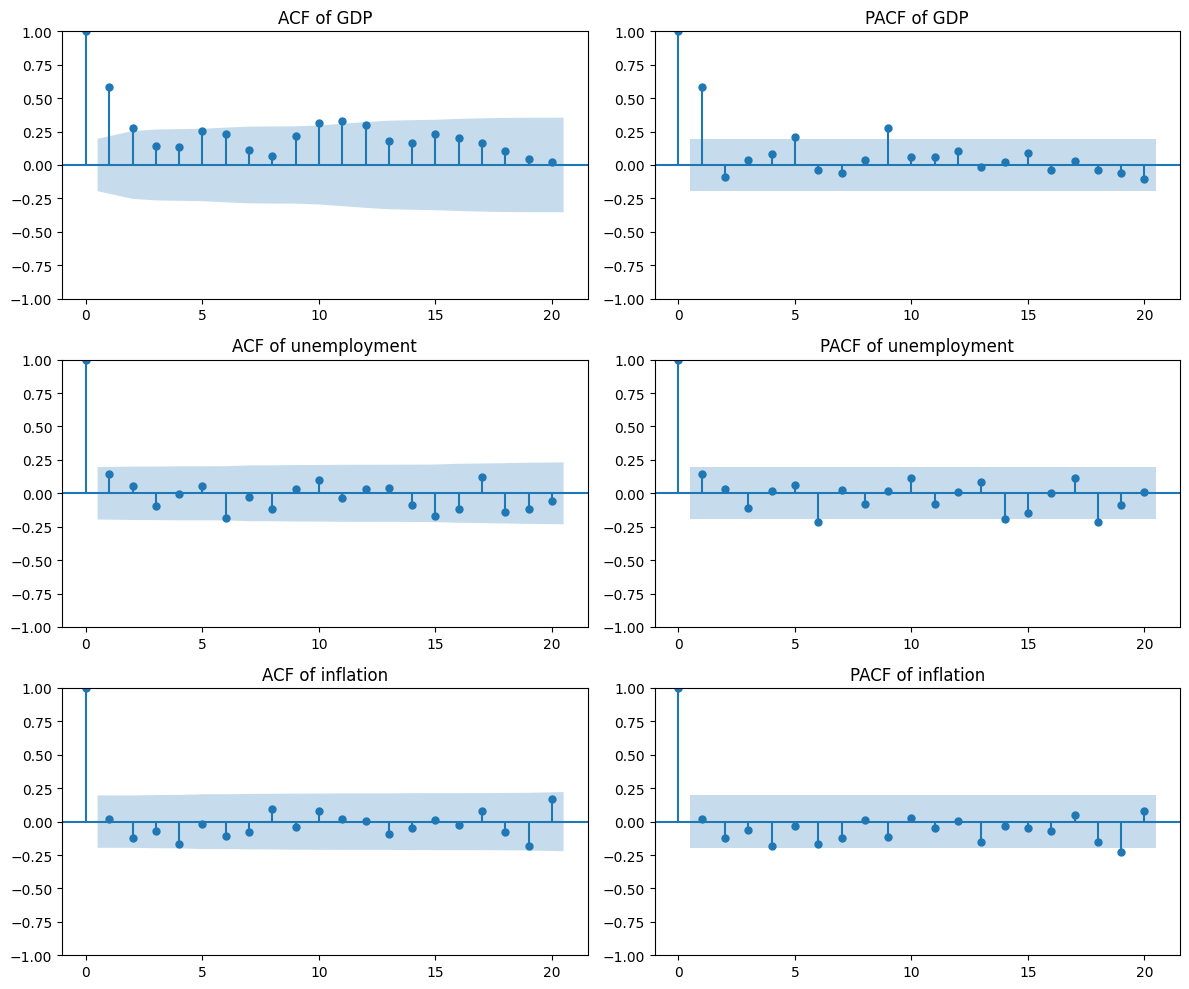

In [167]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

dl_GDP = np.diff(df["realGDP"])
dl_unemployment = np.diff(df["unemployment"])
dl_inflation = np.diff(df["inflation"])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

plot_acf(dl_GDP, title="ACF of GDP", ax=axes[0, 0])
plot_pacf(dl_GDP, title="PACF of GDP", ax=axes[0, 1])

plot_acf(dl_unemployment, title="ACF of unemployment", ax=axes[1, 0])
plot_pacf(dl_unemployment, title="PACF of unemployment", ax=axes[1, 1])

plot_acf(dl_inflation, title="ACF of inflation", ax=axes[2, 0])
plot_pacf(dl_inflation, title="PACF of inflation", ax=axes[2, 1])

plt.tight_layout()
plt.show()

#### GDP:

Upon examining the ACF (AutoCorrelation Function) plot of GDP, it is evident that the significance of the lag 1 value is notable. Lag 2, lag 10, and lag 11 also exhibit significance, albeit being extremely close to the significance threshold.
We can also see a slite seasonal pattern in the ACF plot.

The PACF (Partial AutoCorrelation Function) plot reveals that lag 1 holds the highest significance, while lag 5 and lag 9 also exhibit significance, though they are in close proximity to the significance threshold.

Consequently, it can be deduced that considering the close alignment with the expected behavior, employing an MA(1) model is a plausible choice. Alternatively, an ARMA(1,1) model might be suitable for modeling the GDP.

#### Unemployment:

Examining the graphs, it is evident that the 'Unemployment Rate' data series displays negligible autocorrelation based on the ACF plot. This suggests that the series demonstrates characteristics akin to white noise or a stationary random walk. Consequently, employing models like AutoRegressive (AR) or Moving Average (MA) for predicting the data series is not feasible.

#### Inflation:

Looking at the charts for the 'Inflation Rate,' just like we did for the 'Unemployment Rate,' we see that the data doesn't really connect much in the ACF plot. This means the inflation rate acts a bit like random noise or a steady walk, similar to what we saw with the unemployment rate. So, just like with unemployment, it doesn't make sense to use models like AutoRegressive (AR) or Moving Average (MA) to guess where the inflation rate is going.

**<font color="#0078D4" size="5">
    Question 38: Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion. 
</font>**

Parsimony and Ockham's razor say, "Keep it simple."

When explaining things, choose the simplest idea that makes sense. Ockham's razor helps cut out unnecessary details.

Information criterion measures how well you're keeping things simple and powerful. It's like aiming for a straightforward and effective explanation.

**<font color="#0078D4" size="5">
    Question 39: Explain the problem of auto-correlation of the errors.  
</font>**

Autocorrelation of errors happens when the mistakes in a regression model are connected to each other. This means that the errors in one period are influenced by the errors in earlier times, going against the assumption that errors are independent.

Autocorrelation creates issues for ordinary least squares (OLS) estimation. While the estimated regression coefficients are still okay, they lose the advantage of being the most efficient. Also, the Mean Squared Error (MSE)
might not show the true error variance correctly, and the standard error of regression coefficients might not give the right idea about how spread out the values are.
When this happens, the usual statistical methods and confidence intervals can't be trusted.

**<font color="#0078D4" size="5">
    Question 40:  Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors. 
</font>**

In [168]:
# We have to difference the time series in order to make them stationary
realGDP_diff = np.array(np.diff(df["realGDP"]), dtype=float)
unemployment_diff = np.array(np.diff(df["unemployment"]), dtype=float)
inf_diff = np.array(np.diff(df["inflation"]), dtype=float)

y = realGDP_diff
const = np.ones(len(y))
X = np.column_stack((const, unemployment_diff, inf_diff))

# We first perform a regression with all variables
model = sm.OLS(y, X).fit()
residuals = model.resid

n = len(residuals)
u = residuals[1:n]
u_1 = residuals[0 : n - 1]

# Now we perform a regression on the residuals and the lagged residuals
y = u
const = np.ones(len(y))
X = np.column_stack((const, u_1))

model = sm.OLS(y, X).fit()
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject H0 - There is serial correlation in the residuals\np-value:", p_value)
else:
    print(
        "Failed to reject H0 - There is no serial correlation in the residuals\np-value:",
        p_value,
    )

Reject H0 - There is serial correlation in the residuals
p-value: 1.8834347632718846e-10


We can use the Durbin-Watson test provided by statsmodel, to test the hypothesis of no-autocorrelation of errors and check if our conclusion is correct.

In [169]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw)

if dw < 2:
    print("There is positive autocorrelation in the residuals")
elif dw > 2:
    print("There is negative autocorrelation in the residuals")
else:
    print("There is no autocorrelation in the residuals")

Durbin-Watson statistic: 0.8053000430343396
There is positive autocorrelation in the residuals


As we can see, even the Durbin-Watson test rejects the null hypothesis of no-autocorrelation of errors. This means that we have to use a model that takes into account the autocorrelation of the errors.

**<font color="#0078D4" size="5">
    Question 41: Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40.
</font>**

In [170]:
from scipy.linalg import toeplitz

y = realGDP_diff
const = np.ones(len(y))
X_0 = np.column_stack((const, unemployment_diff, inf_diff))

# We first perform a regression with all variables
model = sm.OLS(y, X_0).fit()
residuals = model.resid

n = len(residuals)
y = residuals[1:n]
lagged_residuals = residuals[0 : n - 1]
const = np.ones(len(y))
X_1 = np.column_stack((const, lagged_residuals))
model = sm.OLS(y, X_1).fit()
rho = model.params[1]

# X_tilde = X - rho * np.column_stack((unemployment_diff, inf_diff)) # X_tilde = (1 - rho) * X
order = toeplitz(range(len(residuals)))
sigma = rho**order

# We perform a regression with the transformed variables (Feasible GLS of the AR(1) model)
y = realGDP_diff
model = sm.GLS(y, X_0, sigma=sigma).fit()
print(model.summary())
residuals_gls = model.resid

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            GLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.07e-07
Time:                        23:43:57   Log-Likelihood:                -1078.5
No. Observations:                 100   AIC:                             2163.
Df Residuals:                      97   BIC:                             2171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.286e+04   2936.673      4.380      0.0

As we can see, the Durbin-Watson statistic is now close to 2, which means that the autocorrelation of the errors has been corrected.

**<font color="#0078D4" size="5">
    Question 42: For all variables, construct their lag 1 and lag 2 variables.
</font>**

In [171]:
n = df.shape[0]

df_1 = np.array(df[1 : n - 1], dtype=float)
df_2 = np.array(df[0 : n - 2], dtype=float)

print("lag 1: ", df_1)
print("lag 2: ", df_2)

lag 1:  [[ 1.84974529e+05  4.87735081e+00 -3.00000000e-01]
 [ 1.87756551e+05  5.14569424e+00  0.00000000e+00]
 [ 1.86015768e+05  5.60350698e+00  1.10330993e+00]
 [ 1.88155559e+05  6.91482147e+00 -3.96825397e-01]
 [ 1.93665734e+05  6.48319831e+00  3.98406375e-01]
 [ 1.98524153e+05  5.18036906e+00 -9.92063492e-02]
 [ 2.02300112e+05  4.40135579e+00  1.58887786e+00]
 [ 1.94777086e+05  7.10573704e+00  1.27077224e+00]
 [ 1.99383307e+05  7.54128620e+00  1.93050193e-01]
 [ 2.04633217e+05  5.79390638e+00  2.11946050e+00]
 [ 2.11384784e+05  4.74742084e+00  2.83018868e-01]
 [ 2.14508404e+05  3.96671031e+00  2.82220132e+00]
 [ 2.23344587e+05  3.62057245e+00  6.40439158e-01]
 [ 2.27790457e+05  3.15638451e+00  2.54545455e+00]
 [ 2.40295540e+05  9.48316738e-01  1.25000000e+01]
 [ 2.42999513e+05  3.29102022e-01  1.81000000e+01]
 [ 2.41402923e+05  4.66200466e-01  2.52000000e+01]
 [ 2.46001108e+05  6.47249191e-01  2.20000000e+01]
 [ 2.26744357e+05  3.02474794e+00  1.01000000e+01]
 [ 2.13407661e+05  1.95

**<font color="#0078D4" size="5">
    Question 43: Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why? 
</font>**

In [172]:
y = np.array(realGDP[2:n].values, dtype=float)
un_1 = df_1[:, 1]
un_2 = df_1[:, 2]
inf_1 = df_2[:, 1]
inf_2 = df_2[:, 2]

const = np.ones(len(y))
X = np.column_stack((const, un_1, un_2, inf_1, inf_2))

model = sm.OLS(y, X).fit()
print(model.summary())
print("\nNumber of observations:", int(model.nobs))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     5.302
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000679
Time:                        23:43:57   Log-Likelihood:                -1393.3
No. Observations:                  99   AIC:                             2797.
Df Residuals:                      94   BIC:                             2810.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.279e+05   7.49e+04      3.040      0.0

The number of observations is 99, beacause we have to drop the first two observations, since we don't have the lagged values for them.

**<font color="#0078D4" size="5">
    Question 44: State and test the no-Granger causality hypothesis of inflation on GDP at the 10% level.
</font>**

If we have a model defined as:
$$y_t = \delta{_0} + \alpha{_1} y_{t-1} + + \alpha{_2} y_{t-2} + \gamma{_1} z_{t-1} + \gamma{_2} z_{t-2}$$

Where $y_t$ is the GDP and $z_t$ is the inflation, then the no-Granger causality hypothesis of inflation on GDP is:

$$H_0: \gamma{_1} = \gamma{_2} = 0$$

In [173]:
from scipy.stats import f

n = len(df)

# unrestricted model
y = np.array(df["realGDP"][2:n], dtype=float)
y_1 = np.array(df["realGDP"][1 : n - 1], dtype=float)
y_2 = np.array(df["realGDP"][0 : n - 2], dtype=float)
inf_1 = np.array(df["inflation"][1 : n - 1], dtype=float)
inf_2 = np.array(df["inflation"][0 : n - 2], dtype=float)
const = np.ones(n - 2)
X = np.column_stack((const, y_1, y_2, inf_1, inf_2))

model = sm.OLS(y, X)
results = model.fit()

k_ur = X.shape[1]
SSR_ur = results.ssr

# restricted model
X = np.column_stack((const, y_1, y_2))

model = sm.OLS(y, X)
results = model.fit()

k_r = X.shape[1]
SSR_r = results.ssr

# k_ur - k_r = number of restrictions
# n - 2 = number of observations
# k_ur = number of parameters in unrestricted model
# k_r = number of parameters in restricted model

F = ((SSR_r - SSR_ur) / SSR_ur) * ((n - 2 - k_ur) / (k_ur - k_r))

p_value = 1 - f.cdf(F, k_ur - k_r, n - 2 - k_ur)
print(f"F: {F}\np-value: {p_value}\n")

if p_value < 0.1:
    print("Reject H0 - inflation Granger causes real GDP\n")
else:
    print("Failed to Reject H0 - inflation does not Granger cause real GDP\n")

F: 1.9765913064730172
p-value: 0.1442571036794863

Failed to Reject H0 - inflation does not Granger cause real GDP



To check if the previous way of testing for Granger causality is correct, we also use the statsmodels library to check for Granger causality.

In [174]:
from statsmodels.tsa.stattools import grangercausalitytests

F, p_value, _, _ = grangercausalitytests(df[["realGDP", "inflation"]], maxlag=2)[2][0][
    "ssr_ftest"
]
print(f"F: {F}\np-value: {p_value}\n")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1783  , p=0.0146  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=6.3694  , p=0.0116  , df=1
likelihood ratio test: chi2=6.1747  , p=0.0130  , df=1
parameter F test:         F=6.1783  , p=0.0146  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9766  , p=0.1443  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=4.1635  , p=0.1247  , df=2
likelihood ratio test: chi2=4.0783  , p=0.1301  , df=2
parameter F test:         F=1.9766  , p=0.1443  , df_denom=94, df_num=2
F: 1.9765913064731617
p-value: 0.14425710367946593



As we can see the F-statistic and the p-value are the same as the ones we calculated before.

**<font color="#0078D4" size="5">
    Question 45: Divide the sample in two groups: 1900-1950 and 1951-2000. Test the stability of coefficients between the two periods.
</font>**

To answer this question we will use the Chow test.

In [175]:
from scipy.stats import f

n = len(df)

# We devide the sample in two periods
realGDP = np.array(df["realGDP"], dtype=float)
unemployment = np.array(df["unemployment"], dtype=float)
inflation = np.array(df["inflation"], dtype=float)

df_p1 = df[0:51].reset_index(drop=True)
realGDP_1 = np.array(df_p1["realGDP"], dtype=float)
unemployment_1 = np.array(df_p1["unemployment"], dtype=float)
inflation_1 = np.array(df_p1["inflation"], dtype=float)

df_p2 = df[51:n].reset_index(drop=True)
realGDP_2 = np.array(df_p2["realGDP"], dtype=float)
unemployment_2 = np.array(df_p2["unemployment"], dtype=float)
inflation_2 = np.array(df_p2["inflation"], dtype=float)

X = np.column_stack((unemployment, inflation))
X = sm.add_constant(X)
y = realGDP

model_full = sm.OLS(y, X).fit()
SSR_full = model_full.ssr
k = model_full.df_model + 1

X_1 = np.column_stack((unemployment_1, inflation_1))
X_1 = sm.add_constant(X_1)
y_1 = realGDP_1

model_period1 = sm.OLS(y_1, X_1).fit()
SSR_period1 = model_period1.ssr
n_period1 = model_period1.nobs

X_2 = np.column_stack((unemployment_2, inflation_2))
X_2 = sm.add_constant(X_2)
y_2 = realGDP_2

model_period2 = sm.OLS(y_2, X_2).fit()
SSR_period2 = model_period2.ssr
n_period2 = model_period2.nobs

alpha = 0.05

# After performing regression on the full sample and the two sub-samples, we can compute the Chow statistic (F-statistic with SSRs)
chow_statistic = (
    (SSR_full - (SSR_period1 + SSR_period2))
    / (SSR_period1 + SSR_period2)
    * (n_period1 + n_period2 - 2 * k)
    / k
)
critical_value = f.ppf(1 - alpha, k, n_period1 + n_period2 - 2 * k)
p_value = 1 - f.cdf(chow_statistic, k, n_period1 + n_period2 - 2 * k)

print("Chow Statistic:", chow_statistic)
print("Critical Value:", critical_value)
print("P-value:", p_value)

if p_value < 0.05:
    print(
        "Reject the null hypothesis. Coefficients are significantly different in the two sub-samples."
    )
else:
    print(
        "Fail to reject the null hypothesis. Coefficients are not significantly different in the two sub-samples."
    )

Chow Statistic: 140.46716783543891
Critical Value: 2.700409062969801
P-value: 1.1102230246251565e-16
Reject the null hypothesis. Coefficients are significantly different in the two sub-samples.


**<font color="#0078D4" size="5">
    Question 46: Test the structural breakpoint using a trim ratio of 25% at the 10% level.
</font>**

In [176]:
n = len(df)
trim = n * 0.25

# We trim the original sample by removing the first and last 25% of the observations
df_25 = df[int(trim) : int(n - trim)].reset_index(drop=True)

realGDP_25 = np.array(df_25["realGDP"], dtype=float)
unemployment_25 = np.array(df_25["unemployment"], dtype=float)
inflation_25 = np.array(df_25["inflation"], dtype=float)

X = np.column_stack((unemployment, inflation))
X = sm.add_constant(X)
y = realGDP

model_full = sm.OLS(y, X).fit()
SSR_full = model_full.ssr
k = model_full.df_model + 1

best_chow = 0
best_t = 0
best_crit = 0
best_p_value = 0

# To answer this question, we perform the Chow test for each possible split of the sample (Quandt likelihood ratio (QLR) test)
for t in range(1, len(df_25)):
    realGDP_25_period1 = realGDP_25[0:t]
    unemployment_25_period1 = unemployment_25[0:t]
    inflation_25_period1 = inflation_25[0:t]

    realGDP_25_period2 = realGDP_25[t:]
    unemployment_25_period2 = unemployment_25[t:]
    inflation_25_period2 = inflation_25[t:]

    y_1 = realGDP_25_period1
    const = np.ones(len(y_1))
    X_1 = np.column_stack((const, unemployment_25_period1, inflation_25_period1))

    model_period1 = sm.OLS(y_1, X_1).fit()
    SSR_period1 = model_period1.ssr
    n_period1 = model_period1.nobs

    y_2 = realGDP_25_period2
    const = np.ones(len(y_2))
    X_2 = np.column_stack((const, unemployment_25_period2, inflation_25_period2))

    model_period2 = sm.OLS(y_2, X_2).fit()
    SSR_period2 = model_period2.ssr
    n_period2 = model_period2.nobs

    chow_statistic = (
        (SSR_full - (SSR_period1 + SSR_period2))
        / (SSR_period1 + SSR_period2)
        * (n_period1 + n_period2 - 2 * k)
        / k
    )

    if chow_statistic > best_chow:
        best_chow = chow_statistic
        best_t = t
        best_crit = f.ppf(1 - alpha, k, n_period1 + n_period2 - 2 * k)
        best_p_value = 1 - f.cdf(chow_statistic, k, n_period1 + n_period2 - 2 * k)

print("Breakpoint year:", 1925 + best_t)
print("Higher Chow statistic:", best_chow)
print("Critical value:", best_crit)
print("P-value:", best_p_value)

if best_p_value < 0.1:
    print(
        "\nReject the null hypothesis. Coefficients are significantly different in the two sub-samples."
    )
else:
    print(
        "\nFail to reject the null hypothesis. Coefficients are not significantly different in the two sub-samples."
    )

Breakpoint year: 1959
Higher Chow statistic: 1757.1965374200697
Critical value: 2.816465816565682
P-value: 1.1102230246251565e-16

Reject the null hypothesis. Coefficients are significantly different in the two sub-samples.
